### Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Extract dataset

In [ ]:
! tar -zxvf drive/MyDrive/I2ML/dataset.tar.gz

Output streaming troncato alle ultime 5000 righe.
dataset/test/4672.png
dataset/test/3221.png
dataset/test/2956.png
dataset/test/2552.png
dataset/test/4837.png
dataset/test/1306.png
dataset/test/835.png
dataset/test/1858.png
dataset/test/2669.png
dataset/test/4675.png
dataset/test/1366.png
dataset/test/3322.png
dataset/test/659.png
dataset/test/4589.png
dataset/test/818.png
dataset/test/1045.png
dataset/test/2880.png
dataset/test/4133.png
dataset/test/50.png
dataset/test/1839.png
dataset/test/5064.png
dataset/test/3288.png
dataset/test/2366.png
dataset/test/4763.png
dataset/test/2437.png
dataset/test/2510.png
dataset/test/296.png
dataset/test/558.png
dataset/test/1352.png
dataset/test/193.png
dataset/test/5154.png
dataset/test/138.png
dataset/test/543.png
dataset/test/5183.png
dataset/test/2252.png
dataset/test/1579.png
dataset/test/5107.png
dataset/test/1793.png
dataset/test/1095.png
dataset/test/5320.png
dataset/test/1962.png
dataset/test/5010.png
dataset/test/2631.png
dataset/test/5

In [ ]:
#%cd dataset
#%cd ..
! ls
# cd train


dataset  drive	sample_data


### Splitting folder for validation

In [ ]:
! mkdir dataset/src

In [ ]:
from distutils.dir_util import copy_tree
import shutil
copy_tree("dataset/train/", "dataset/src")

shutil.rmtree('dataset/train/')

In [ ]:
! ls dataset/src/Merging/

10025.png  11706.png  2118.png	380.png   5237.png  6835.png  8522.png
10033.png  11709.png  2124.png	3812.png  5253.png  6845.png  8525.png
10044.png  11719.png  212.png	3816.png  5269.png  6847.png  8553.png
10052.png  11730.png  2138.png	3817.png  5270.png  684.png   8576.png
10073.png  11745.png  213.png	3835.png  5281.png  6853.png  8586.png
10077.png  11754.png  2161.png	3839.png  5317.png  6880.png  8613.png
1008.png   11756.png  2162.png	3841.png  531.png   6893.png  8620.png
1009.png   11758.png  2163.png	3860.png  5328.png  6907.png  8626.png
100.png    11760.png  2169.png	3883.png  5332.png  691.png   8645.png
10100.png  11764.png  219.png	3891.png  5337.png  6923.png  8663.png
10104.png  11768.png  2234.png	3902.png  5338.png  6925.png  8666.png
10134.png  11780.png  2235.png	3903.png  5344.png  6926.png  866.png
10140.png  11784.png  2237.png	3908.png  5349.png  6929.png  8674.png
10144.png  11809.png  2238.png	3922.png  5369.png  693.png   8682.png
10146.png  11819.png  22

In [ ]:
import os
import numpy as np
import shutil
import random

# # Creating Train / Val folders (One time use)
root_dir = 'dataset'
classes_dir = ['/Barred Spiral','/Edge-on without Bulge','/Unbarred Loose Spiral','/Cigar Shaped Smooth','/In-between Round Smooth','/Unbarred Tight Spiral','/Disturbed','/Merging','/Edge-on with Bulge','/Round Smooth']

#val_ratio = 0.15
#test_ratio = 0.05
for cls in classes_dir:
    
    os.makedirs(root_dir +'/train' + cls)
    os.makedirs(root_dir +'/val' + cls)

    # Creating partitions of the data after shuffeling
    src = root_dir + "/src" + cls # Folder to copy images from

    allFileNames = os.listdir(src)
    random.shuffle(allFileNames)
    print(len(allFileNames))
    
    
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*0.8)])
                                              

    """
    train_FileNames, val_FileNames = torch.utils.data.random_split(allFileNames[i], 
                                                                  [int(len(allFileNames[i])*0.8), int(len(allFileNames[i])*0.2)], 
                                                                  generator=torch.Generator().manual_seed(42))
    """


    train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
    val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

    print('Total images: ', len(allFileNames))
    print('Training: ', len(train_FileNames))
    print('Validation: ', len(val_FileNames))

    # Copy-pasting images
    for name in train_FileNames:
        shutil.copy(name, root_dir +'/train' + cls)

    for name in val_FileNames:
        shutil.copy(name, root_dir +'/val' + cls)
    


1430
Total images:  1430
Training:  1144
Validation:  286
996
Total images:  996
Training:  796
Validation:  200
1840
Total images:  1840
Training:  1472
Validation:  368
234
Total images:  234
Training:  187
Validation:  47
1419
Total images:  1419
Training:  1135
Validation:  284
1280
Total images:  1280
Training:  1024
Validation:  256
757
Total images:  757
Training:  605
Validation:  152
1297
Total images:  1297
Training:  1037
Validation:  260
1311
Total images:  1311
Training:  1048
Validation:  263
1851
Total images:  1851
Training:  1480
Validation:  371


In [ ]:
!ls dataset/val/Barred\ Spiral

0.png	   11662.png  2019.png	3731.png  5131.png  6938.png  8716.png
10015.png  11750.png  2151.png	3747.png  5152.png  6945.png  8718.png
10108.png  11817.png  2210.png	3758.png  5173.png  6963.png  8731.png
10130.png  11889.png  2218.png	3799.png  5174.png  6997.png  8747.png
10136.png  11898.png  2222.png	3886.png  5246.png  7021.png  8753.png
10217.png  1192.png   2225.png	3.png	  5258.png  7175.png  8776.png
10218.png  12031.png  2270.png	4065.png  527.png   7186.png  8821.png
10284.png  12076.png  2418.png	4069.png  5324.png  7206.png  8879.png
10293.png  12086.png  2442.png	4096.png  5373.png  7292.png  8888.png
10328.png  12171.png  2445.png	4139.png  5423.png  7322.png  8901.png
10379.png  12174.png  2465.png	4148.png  5537.png  7346.png  8904.png
10397.png  12187.png  2507.png	4165.png  5588.png  7369.png  8914.png
10425.png  12276.png  2516.png	426.png   5612.png  7390.png  8917.png
10434.png  12308.png  2524.png	4271.png  576.png   744.png   8974.png
10538.png  12365.png  25

In [ ]:
! mkdir dataset/test/unknown
! mv dataset/test/*.png dataset/test/unknown/

# Various imports

In [ ]:
import numpy as np # linear algebra
import os
import torch
import tarfile
import torchvision
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets.utils import download_url


# Dataset, data loader, transformations

In [ ]:
transform_train = transforms.Compose([
    
    transforms.Resize((224,224)), 
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=180),
    transforms.ToTensor(),
    #transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    
])

#Augmentation is not done for test/validation data.
transform_test = transforms.Compose([
    
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    #transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    
])


In [ ]:
train_ds = ImageFolder('./dataset/train', transform=transform_train)
test_ds = ImageFolder('./dataset/val', transform=transform_test)
pred_ds = ImageFolder('./dataset/test', transform=transform_test)

In [ ]:
#checking lengths
len(train_ds),len(test_ds),len(pred_ds)

(9928, 2487, 5321)

In [ ]:
image,label  = train_ds[0]
print(image.shape, label)

torch.Size([3, 224, 224]) 0


In [ ]:
batch_size=32
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(test_ds, batch_size, num_workers=2, pin_memory=True)
pred_dl = DataLoader(pred_ds, batch_size, num_workers=2, pin_memory=True)

# Visualization of a batch in train set

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([32, 3, 224, 224])


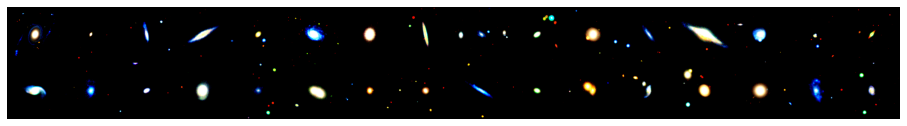

In [ ]:
for images, _ in train_dl:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

# Utilities

In [ ]:
import pathlib
root = pathlib.Path('./dataset/train')
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])
classes

['Barred Spiral',
 'Cigar Shaped Smooth',
 'Disturbed',
 'Edge-on with Bulge',
 'Edge-on without Bulge',
 'In-between Round Smooth',
 'Merging',
 'Round Smooth',
 'Unbarred Loose Spiral',
 'Unbarred Tight Spiral']

# Defintion of accuracy, training step, validation step

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        
        acc = accuracy(out, labels)
        return loss, acc
        
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f},  val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['train_acc'], result['val_loss'], result['val_acc']))

In [ ]:
class CnnModelVGG(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = modelvgg19
        
    def forward(self, xb):
        return self.network(xb)

# Defining the functions for devices

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [ ]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
pred_dl = DeviceDataLoader(pred_dl, device)
#to_device(model, device);

# Training phase

In [ ]:
categories = []
for d in os.listdir("dataset/train"):
    categories.append(d)
    
n_classes = len(categories)
print(f'There are {n_classes} different classes.')

categories = sorted(categories)

There are 10 different classes.


Defining the last layer of the network

In [ ]:
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

Using the premade class for metrics

In [ ]:
class ClassificationMetrics:

  # Constructor takes the number of classes
  def __init__(self, num_classes=10):
    self.num_classes = num_classes
    # Initialize a confusion matrix
    self.C = torch.zeros(num_classes, num_classes) 

  # Update the confusion matrix with the new scores
  def add(self, yp, yt):
    # yp: 1D tensor with predictions
    # yt: 1D tensor with ground-truth targets
    with torch.no_grad(): # We require no computation graph
      self.C+=(yt*self.C.shape[1]+yp).bincount(minlength=self.C.numel()).view(self.C.shape).float()

  def clear(self):
    # We set the confusion matrix to zero
    self.C.zero_()

  # Computes the global accuracy
  def acc(self):
    return self.C.diag().sum().item()/self.C.sum()

  # Computes the class-averaged accuracy
  def mAcc(self):
    return (self.C.diag()/self.C.sum(-1)).mean().item()

  # Computers the class-averaged Intersection over Union
  def mIoU(self):
    return (self.C.diag()/(self.C.sum(0)+self.C.sum(1)-self.C.diag())).mean().item()

  # Returns the confusion matrix
  def confusion_matrix(self):
    return self.C

Retrieving of the best model and changing the last layer 

In [ ]:
bestModel = torch.load('/content/drive/MyDrive/Models/VGG/VGG19best.model')
bestModel.classifier = Identity()
bestModel.eval()
bestModel = to_device(bestModel, device)

Using SVM for training

In [ ]:
from sklearn import svm

features = []
targets=[]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

with torch.no_grad():
  for X,yt in train_dl:
    #X, yt = X.to(device), yt.to(device)

    ft_single = bestModel(X)

    ft_single = ft_single.cpu()
    yt = yt.cpu()

    features.append(ft_single)
    targets.append(yt)

features=torch.cat(features,dim=0)
targets=torch.cat(targets,dim=0)



svm_model=svm.SVC()
svm_model.fit(features,targets)

# We compute the performance of the trained svm on val data
metric_tracker=ClassificationMetrics(num_classes=10)
for X,yt in val_dl:
  with torch.no_grad():
    
    feat=bestModel(X)

    feat = feat.cpu()

    yp = svm_model.predict(feat)

    yt = yt.cpu()

    metric_tracker.add(yp,yt)

print("Acc: {} | mAcc: {} | mIoU: {}".format(metric_tracker.acc(),metric_tracker.mAcc(),metric_tracker.mIoU() ))


Acc: 0.8890228867530823 | mAcc: 0.8697832226753235 | mIoU: 0.7806361317634583


# Testing phase

Here we define the function that make the prediction on the single image

In [ ]:
def predict_single_testSVM(input, model, svm_model, path, pred_list):
    input = input.cuda()
    inputs = input.unsqueeze(0)   # unsqueeze the input i.e. add an additonal dimension
    
    feat = model(inputs)
    feat = feat.detach().cpu()

    pred = svm_model.predict(feat)
    pred = torch.from_numpy(pred)
    
    number_label = (pred).item()

    if number_label == 0:
      label = categories[0]
    if number_label == 1:
      label = categories[1]
    if number_label == 2:
      label = categories[2]
    if number_label == 3:
      label = categories[3]
    if number_label == 4:
      label = categories[4]
    if number_label == 5:
      label = categories[5]
    if number_label == 6:
      label = categories[6]
    if number_label == 7:
      label = categories[7]
    if number_label == 8:
      label = categories[8]
    if number_label == 9:
      label = categories[9]
    
    #print(path,",",label)
    pred_str = ""
    pred_str = pred_str + path + "," + label

    pred_dict = {}
    pred_dict['pred_str'] = pred_str
    pred_dict['num'] = int(path)
    
    #print(pred_dict)

    pred_list.append(pred_dict)
    

Here we predict the label of each image in test set and write in on a CSV file

In [ ]:
from torchvision import datasets
class ImageFolderWithPaths(datasets.ImageFolder):
    def __getitem__(self, index):
        return super(ImageFolderWithPaths, self).__getitem__(index) + (self.imgs[index][0],)


# instantiate the dataset and dataloader
data_dir = "dataset/test"
dataset = ImageFolderWithPaths(root=data_dir, transform=transform_test)
dataloader = DataLoader(dataset)

pred_list = []

for inputs, labels, paths in dataloader:
   

    sliced = paths[0]
    sliced = sliced.replace('.png','')
    sliced = sliced.replace('dataset/test/unknown/','')
    
    
    

    predict_single_testSVM(inputs[0],bestModel, svm_model, sliced, pred_list)


    
pred_list = sorted(pred_list, key=lambda k: int(k['num'])) 

text_file = open("dataset/output.csv", "a")


for x in pred_list:
  #print (x['pred_str'])
  text_file.write(x['pred_str'])
  text_file.write("\n")

text_file.close()
